### 케라스로 딥러닝 모델 만들기
* 대표적인 딥러닝 구현 Tool
  * Tensorflow, Keras, Pytorch

### 케라스(Keras)?
 * ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System) 프로젝트 일부
 * 오네이로스 - 꿈을 의인화 시킨 신
 * 꿈을 인간들에게 보내는 신(진실, 거짓의 문)
 * 밤의 여신 닉스와 잠의 신(힙노스)의 자식들

## 케라스 딥러닝 모델 만들기
 * 가. 데이터 셋 준비
    - 데이터 준비(훈련셋, 검증셋, 시험셋 등)
    - 딥러닝 모델의 학습 및 평가를 위한 데이터 형태 맞추기(포맷 변환)
    
 * 나. 모델 구성
    - 모델(Sequential)을 생성 후, 레이어를 추가하여 구성
    - 복잡한 모델을 구성시에 Keras API를 사용 
        
 * 다. 모델 학습과정 설정하기( 학습에 대한 설정 - compile() )
    - 학습에 대한 설정, 손실 함수 및 최적화 방법 정의
    
 * 라. 모델 학습( 모델을 훈련셋으로 학습 - fit() 함수 ) 
 * 마. 학습과정 살펴보기( 훈련셋, 검증셋의 손실 및 정확도 측정 )
 * 바. 모델 평가( evaluate() ) - 준비된 시험셋으로 학습 모델 평가
 * 사. 모델 사용하기(predict() )

### 내 컴퓨터에 실행해 볼 경우, 사전 설치 필요
* \# only CPU
*   pip install --upgrade tensorflow==1.15.0
* pip install keras
* 만약 설치가 되어 있지 않을경우, 
 * from keras.datasets import mnist 에 에러 발생.
 * No module named 'keras'

In [1]:
import tensorflow as tf
print(tf.__version__)  # 1.5.0 , keras => 2.1.4

C:\Users\front\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.15.0


In [2]:
import keras
print(keras.__version__)  # 1.5.0 , keras => 2.1.4

2.3.1


Using TensorFlow backend.


In [4]:
## 00. 사용할 패키지 불러오기
from keras.datasets import mnist           # 데이터 셋 불러오기
from keras.models import Sequential        
from keras.layers import Dense, Activation 
from keras.utils import np_utils

### 데이터 셋 MNIST
* 6만개의 훈련 이미지
* 만개의 테스트 이미지
* 딥러닝계의 MNIST 
* 1980년대 미국 국립표준 기술 연구소(National Institute of Standards and TEchnology, NIST)에서 수집한 데이터 

## 클래스, 샘플, 레이블
분류의 문제의 범주를 클래스라하고, 데이터 포인터를 샘플(sample)이라고 한다. 특정 샘플의 클래스는 레이블(Label)이라고 한다.

In [5]:
### 데이터 셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train_n = x_train.copy()
y_train_n = y_train.copy()
x_test_n = x_test.copy()
y_test_n = y_test.copy()

In [7]:
# 데이터 셋 크기
# 60000개의 학습용 데이터 셋, 10000개의 테스트 데이터 셋
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
import matplotlib.pyplot as plt

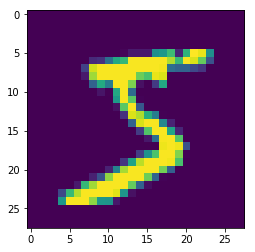

In [9]:
### x_train 의 하나의 데이터 확인
### 60000장의 이미지( 28, 28 숫자데이터)

plt.imshow(x_train[0])

### 10개의 y_train 데이터 셋 확인

In [10]:
print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

label=[5 0 4 1 9 2 1 3 1 4]


label=[5 0 4 1 9 2 1 3 1 4]


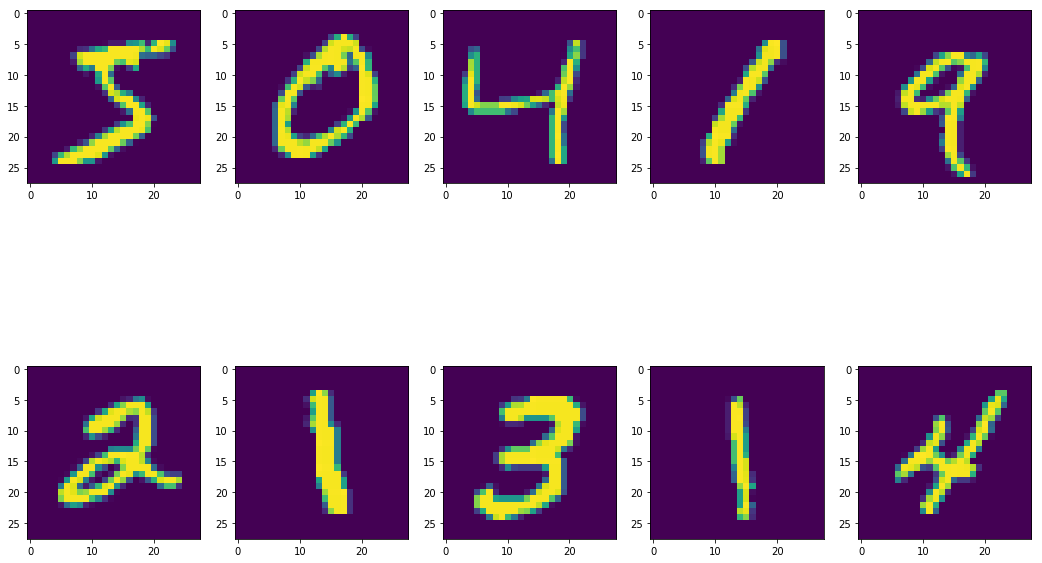

In [12]:
figure,axes = plt.subplots(nrows=2, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

col = 0
for row in range(0,2):
    col = row * 5
    axes[row][0].imshow(x_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(x_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(x_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(x_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(x_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

In [13]:
## 데이터 셋의 변경 60000, 28, 28  -> 60000, 784 (28*28)
## 데이터 셋의 변경 10000, 28, 28  -> 10000, 784 (28*28)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
## 데이터 셋의 변경 60000,   -> 60000, 10 (28*28)
## 데이터 셋의 변경 10000,   -> 10000, 10 (28*28)
print(y_train.shape, y_test.shape)
print(y_train[0:5])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
## 데이터 자료형 변경
## 01. 실수형 변경.
## 02. 값의 범위를 정규화(0~255) -> 0~1로 변경
print(x_train[0])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### 위의 내용을 이렇게 줄일수도 있음.
```
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
```

### 02. 모델 구성하기

In [16]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))  # 입력층(28*28=784노드) - 은닉층(64개노드)
model.add(Dense(units=10, activation='softmax'))                # 출력층(10개 노드) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 다음과 같이 은닉층이 하나 추가되면 다음과 같다.
```
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))  # 입력층(28*28=784노드) - 은닉층(64개노드)
model.add(Dense(units=64, activation='relu'))                                      # 두번째 은닉층(64개)
model.add(Dense(units=10, activation='softmax'))                # 출력층(10개 노드) 
```

## 손실함수(loss function) or 목적함수(objective function)
* 신경망의 출력을 제어하기 위해 출력이 기대하는 것보다 얼마나 벗어났는지에 대해 측정하기
* 비용함수는 모든 훈련 데이터에 대한 손실 함수의 합을 나타내고 목적함수는 더 일반적인 용어로 최적화하기 위한 대상 함수를 의미한다.

### 03. 모델 학습과정 설정하기
* model.compile
  * 손실 함수(loss function) : 훈련 데이터에서 신경망의 성능을 측정하는 방법. 네트워크가 옮은 방향으로 학습될 수 있도록 도와준다.
  * 옵티마이저(optimizer) : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘.
  * metrics : 훈련과 테스트 과정을 모니터링할 지표 : 정확도(정확히 분류된 이미지의 비율)만 고려

* categorical_crossentropy : 여러가지 오차를 구하는 함수 중의 하나
* sgd(Stochastic Gradient Descent) : 데이터 셋을 미니배치만큼 돌려서 찾아가는 방법
* accuracy : 정확도로 성능을 측정

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])

### 04. 모델 학습시키기
* [모델명].fit(__, __, __, __)
* hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
 * x_train : 입력 데이터 
 * y_train : 출력(예측) 데이터 
 * epochs  : 전체 데이터 몇번 돌리것인가?
 * batch_size : 몇개씩 데이터를 돌려볼 것인가?

In [23]:
# hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
hist = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0488 - accuracy: 0.9867
Epoch 2/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0463 - accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0444 - accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0425 - accuracy: 0.9886
Epoch 5/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0408 - accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0390 - accuracy: 0.9896
Epoch 7/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0372 - accuracy: 0.9904
Epoch 8/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0359 - accuracy: 0.9906
Epoch 9/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.0345 - accuracy: 0.9911
Epoch 10/10
60000/60000 [============

### 05. 학습과정 살펴보기
* 각 epoch 별 loss값과 acc 값을 확인해 보기
* 그래프로 확인해 보기

In [25]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[0.04879708709455251, 0.046333540983110044, 0.0444405980285034, 0.0425132727830957, 0.04078002743631441, 0.038973149236791266, 0.03718144563467043, 0.035851681626262386, 0.03446500263636942, 0.03297173329303647]
[0.9866667, 0.98763335, 0.9882, 0.98861665, 0.9892833, 0.9896, 0.99041665, 0.99058336, 0.99105, 0.99151665]


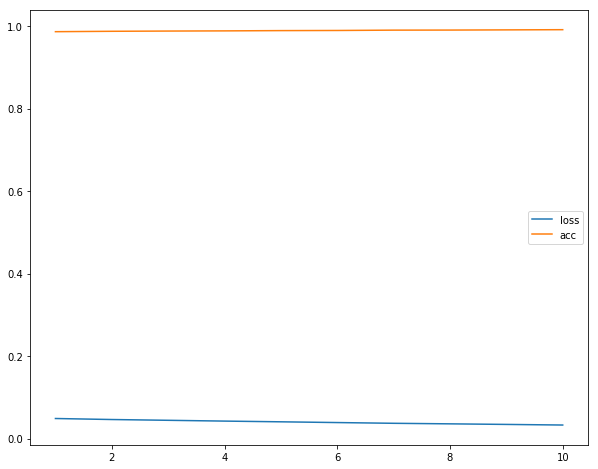

In [27]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

### 6. 모델 평가하기
 * test 데이터 셋을 활용하여 만들어진 모델을 평가해보기

In [28]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

10000/10000 [==============================] - 0s 41us/step
## evaluation loss and_metrics ##
[0.07921419511840214, 0.9764999747276306]


### 7. 모델 사용하여 예측해 보기

In [29]:
# 기존과 변경된 데이터 행열
print(x_test_n[0].shape)
print(x_test[0].shape)

(28, 28)
(784,)


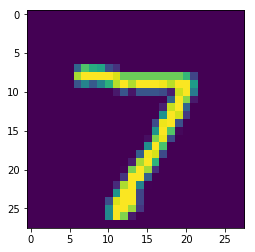

In [30]:
### x_train 의 하나의 데이터 확인
plt.imshow(x_test_n[0])

In [31]:
import numpy as np
# np.set_printoptions(precision=3) 
# 좀 더 확인하기 쉽게 표시
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.6f}".format(x)})

In [32]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat) # 각 값의 확률을 표시
print(yhat.argmax(axis=1))

## yhat ##
[[0.000002 0.000000 0.000015 0.000628 0.000000 0.000000 0.000000 0.999332
  0.000003 0.000020]]
[7]
